# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('Secom.csv')
print(data.info())
data.head()

<ipython-input-1-d55bc6162ecb>:5: DtypeWarning: Columns (0,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43,44,45,46,47,48,50,51,53,54,55,56,57,58,75,76,77,78,79,80,81,82,83,89,90,92,93,103,104,118,136,144,145,146,147,148,150,151,152,153,154,155,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,190,191,192,193,194,195,210,211,212,213,214,215,216,217,218,224,225,227,228,238,239,253,270,271,279,280,281,282,283,285,286,287,288,289,290,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,326,327,328,329,330,331,348,349,350,351,352,353,354,355,356,362,363,365,366,376,377,391,408,409,417,418,419,420,421,423,424,425,426,427,428,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,462,463,464,465,466,467,482,483,484,485,486,487,488,489,490,496,497,499,500,510,511,525,542,543,544,545,558,559,560,561,582,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Sensor 1 to Target
dtypes: float64(122), int64(1), object(468)
memory usage: 7.1+ MB
None


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [2]:
data[data == '!'].count()

Sensor 1       6
Sensor 2       7
Sensor 3      14
Sensor 4      14
Sensor 5      14
              ..
Sensor 587     1
Sensor 588     1
Sensor 589     1
Sensor 590     1
Target         0
Length: 591, dtype: int64

In [3]:
data = data.replace({'\!': np.NaN}, regex=True)

Question 1.2 Confirm that the change has worked

In [4]:
data[data == '!'].count()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
             ..
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 591, dtype: int64

Question 1.3: Fill the missing values with zeroes

In [5]:
data = data.replace({np.NaN: 0}, regex=True) # Why not just replace '!' with '0'?

In [6]:
#Validate that the missing values were replaced
data[data == np.NaN].count()


Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
             ..
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 591, dtype: int64

In [7]:
data.isnull().sum()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
             ..
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 591, dtype: int64

Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

In [8]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

In [9]:
# Scale the dataset so it converges faster in less iterations
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_train_minmax_scaled = mmscaler.fit_transform(X_train)
#X_train_minmax_scaled = pd.DataFrame(X_train)
X_test_minmax_scaled = mmscaler.fit_transform(X_test)
#X_test_minmax_scaled = pd.DataFrame(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(max_iter=1000).fit(X_train_minmax_scaled, y_train)


In [11]:
y_pred = logregr.predict(X_test_minmax_scaled)

Plot ROC Curve

In [12]:
# Extra functions taken from old Case Study for analysis

from IPython.display import display, HTML

def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df


def positive_observations(y):
    # What percentage of observations are positive?
    proportion_1 = ((y == 1).sum() / len(y))
    pct_1        = np.around(proportion_1*100, decimals=3)
    display(HTML('<p><h4>{}%</h4>of observations are positive</p>'.format(pct_1)))

def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': prior_error_rate(confusion_mtx),
                      'total_error_rate': total_error_rate(confusion_mtx),
                      'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
                      'false_negative_rate': false_negative_rate(confusion_mtx),
                      'false_positive_rate': false_positive_rate(confusion_mtx),
                      'true_negative_rate (specificity)': true_negative_rate(confusion_mtx),
                      'positive_predictive_value (precision)': positive_predictive_value(confusion_mtx),
                      'negative_predictive_value': negative_predictive_value(confusion_mtx)})

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04166667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 

,y_pred=0,y_pred=1,Total
,,,
y=0,0,24,24
y=1,0,290,290
Total,0,314,


<ipython-input-12-8d5424fb45d6>:50: RuntimeWarning: invalid value encountered in scalar divide
  return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])


prior_error_rate                         0.076433
total_error_rate                         0.076433
true_positive_rate (sensitivity)         1.000000
false_negative_rate                      0.000000
false_positive_rate                      1.000000
true_negative_rate (specificity)         0.000000
positive_predictive_value (precision)    0.923567
negative_predictive_value                     NaN
dtype: float64

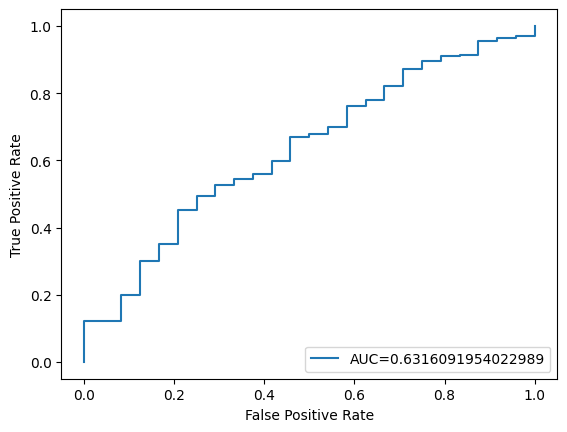

In [13]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = logregr.predict_proba(X_test_minmax_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1, drop_intermediate=False) #drop_intermediate=False so we get all thresholds
print(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_proba)

# Confusion table
display(HTML('<h3>{}</h3>'.format('Logistic Regression')))
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))
# Classifier stats
display(classifier_stats(confusion_mtx))

# Create a ROC curve with the AUC label
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Plot the ROC curve


Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

In [14]:
data.shape

(1567, 591)

In [15]:
from sklearn.feature_selection import RFE

regr = RFE(LogisticRegression(solver='saga', max_iter=5000, random_state=42), n_features_to_select=40, step=10) # this takes forever
regr.fit(X_train_minmax_scaled, y_train)


RFE(estimator=LogisticRegression(max_iter=5000, random_state=42, solver='saga'),
    n_features_to_select=40, step=10)

In [16]:
y_pred = regr.predict(X_test_minmax_scaled)

display(HTML('<h3>{}</h3>'.format('Logistic Regression RFE')))
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))
display(classifier_stats(confusion_mtx))

,y_pred=0,y_pred=1,Total
,,,
y=0,0,24,24
y=1,3,287,290
Total,3,311,


prior_error_rate                         0.076433
total_error_rate                         0.085987
true_positive_rate (sensitivity)         0.989655
false_negative_rate                      0.010345
false_positive_rate                      1.000000
true_negative_rate (specificity)         0.000000
positive_predictive_value (precision)    0.922830
negative_predictive_value                0.000000
dtype: float64

Plot ROC Curve

AUC: 0.6081896551724139


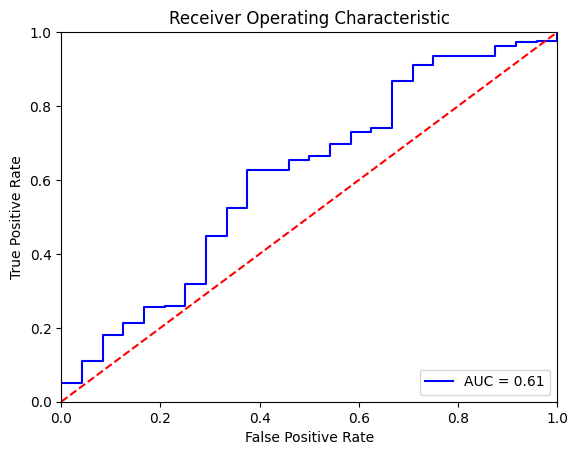

In [17]:
%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = regr.predict_proba(X_test_minmax_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, drop_intermediate=False) #drop_intermediate=False so we get all thresholds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Question 3.1: Apply stratisfied tain test split to account for class imbalance

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2)

X_train_minmax_scaled = mmscaler.fit_transform(X_train)
X_test_minmax_scaled = mmscaler.fit_transform(X_test)

Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [19]:
regr = RFE(LogisticRegression(solver='saga', max_iter=10000, random_state=42), n_features_to_select=40, step=10)
regr.fit(X_train_minmax_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=10000, random_state=42,
                                 solver='saga'),
    n_features_to_select=40, step=10)

AUC: 0.6756053957419146


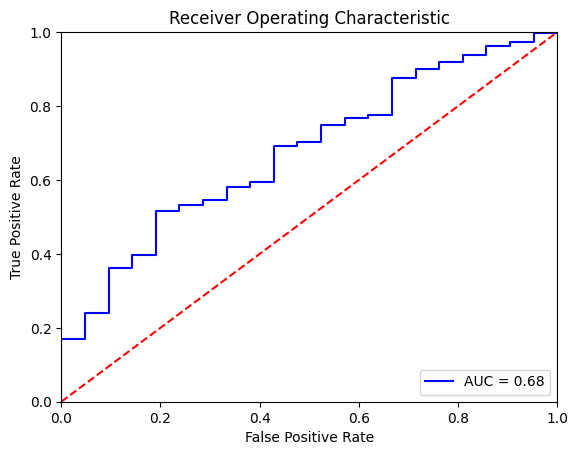

In [20]:
%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = regr.predict_proba(X_test_minmax_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, drop_intermediate=False) #drop_intermediate=False so we get all thresholds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data

In [25]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
list_accu_stratified = []

k_logregr = LogisticRegression(solver='saga', max_iter=5000, random_state=42)

x_scaled = mmscaler.fit_transform(X)

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    k_logregr.fit(x_train_fold, y_train_fold)
    list_accu_stratified.append(k_logregr.score(x_test_fold, y_test_fold))

# Taken from https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/#
print('List of possible accuracy:', list_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(list_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(list_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(list_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(list_accu_stratified))

List of possible accuracy: [0.9299363057324841, 0.9331210191082803, 0.9233226837060703, 0.9361022364217252, 0.9297124600638977]

Maximum Accuracy That can be obtained from this model is: 93.61022364217251 %

Minimum Accuracy: 92.33226837060703 %

Overall Accuracy: 93.04389410064915 %

Standard Deviation is: 0.004761512171798165


Implement the model and then create the ROC Curve

AUC: 0.9327157484154072


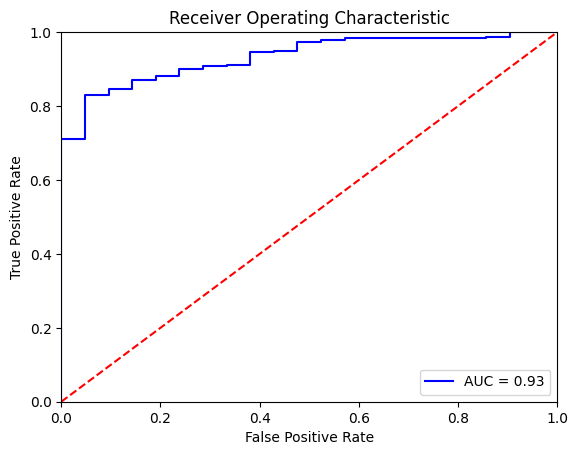

In [26]:
# Plot the ROC curve
%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = k_logregr.predict_proba(X_test_minmax_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, drop_intermediate=False) #drop_intermediate=False so we get all thresholds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Question 4.2: Summarize your findings of all above models

# Analysis

Stratified K-Fold blows the rest of these model evaluations out of the water with a max accuracy of 93.61022364217251 ! The other RFE models are extremely slow to generate, and the end result is marginal increases in model quality. The default logistic regression without RFE is actually better than the logreg with some RFE, but that could be mitigated potentially by different steps or number of features. The other models are better in some ways but RFE being computationally expensive seems to limit it's usability.

Scaling the data seems almost necessary if doing this in a Colab environment, and I used the Saga solver and iterations of 5000 across the board to ensure convergence.

<h3> Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary
    (or short description of your thinking in applying this week's learning to the solution)
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

# Question 5

* No previous experience. Pretty new to this whole machine learning thing, other than some of the work we did in previous assignments and in the case studies.
* I like to use the lecture + online resources to help guide me in terms of the actual execution of the labs. I also like to reference my previous notebooks and case studies.
* Obstacles: RFE IS HORRIBLY SLOW. It takes so long. Increasing the step seems to help, but even then for such a large dataset it can take minutes. Since I did this on Colab, the runtime gets quite slow and will hang occasionally.
* I think scaling this dataset is a good way to get the LogRegressions to converge faster, and increases performance of the RFE as well. This step was missing.
* I also wanted to use seaborn just to look at all the sensor data in a pairplot/histplot setup but it took forever to generate.